## Final Project Submission

* Student name: Simran Kaur
* Student pace: Part Time
* Scheduled project review date/time: Thursday, January 5th, 2023. 
* Instructor name: Morgan Jones
* Blog post URL: TBD

# King County Housing Analysis

## Overview

The client is a group of investors that would like to buy houses in King County, Washington. They want to understand what features are indicators of a good investment. 

This project will run a couple regression models to predict which features add the most value to a home. Data will be taken from the King County Housing dataset; it contains information on the size, location, condition, and other features of houses in King County, Washington. 

## Obtaining Data

In [1]:
# Import modules and packages

# Data manipulation
import pandas as pd
import numpy as np

# Statistical analysis and modeling 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from scipy.stats import norm
from sklearn.datasets import make_classification

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data from csv file & create dataframe. Preview first 10 rows.
df = pd.read_csv('data/kc_house_data.csv')
df.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   
5    101930     1.0         NO  NONE  ...   11 Excellent       3890   
6      6819     2.0         NO  NONE  ...      7 Average       1715   
7      9711     1.0         NO   NaN  ...      7 Average       1060   
8      7470     1.0         NO  NONE  ...      7 Average       1050   
9      6560     2.0         NO  NONE  ...      7 Average       1890   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   
5         1530.0     2001           0.0    98053  47.6561 -122.005   
6              ?     1995           0.0    98003  47.3097 -122.327   
7            0.0     1963           0.0    98198  47.4095 -122.315   
8          730.0     1960           0.0    98146  47.5123 -122.337   
9            0.0     2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

#### Summary of features in the dataframe:

* id - Unique identifier for a house
* date - Date house was sold
* price - Prediction target
* bedrooms - Number of of bedrooms in the house
* bathrooms - Number of bathrooms in the house
* sqft_living - Square footage of the house
* sqft_lot - Square footage of the lot
* floors - Total floors in the house
* waterfront - If the house has a waterfront view or not
* view - Overall view that can be seen from the house
* condition - Overall condition of the house
* grade - Overall grade given to the house, based on King County grading system
* sqft_above - Square footage of house, seperate from the basement
* sqft_basement - Square footage of the basement
* yr_built - Year house was built
* yr_renovated - Year house was renovated
* zipcode - Zipcode
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Square footage of the interior housing living space for the nearest 15 neighbors
* sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors

## Explanatory Data Analysis (EDA) - Part I

* This section is dedicated to cleaning the dataset and creating new columns for a stronger analysis. 

In [3]:
# Assess dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The ID column can be deleted as it is used to strictly identify the houses in dataset. It doesn't hold any value in terms of the analysis. 

In [4]:
# Drop "id" column as it is not needed
df.drop(['id'], axis=1, inplace=True)

# Rename lat, long, yr_built & ys_renovated columns
df = df.rename(columns = {'lat':'latitude'})
df = df.rename(columns = {'long':'longitude'})
df = df.rename(columns = {'yr_built':'year_built'})
df = df.rename(columns = {'yr_renovated':'year_renovated'})

In [5]:
# Check which columns(if any) have "?" as a value
df.eq('?').any()

date              False
price             False
bedrooms          False
bathrooms         False
sqft_living       False
sqft_lot          False
floors            False
waterfront        False
view              False
condition         False
grade             False
sqft_above        False
sqft_basement      True
year_built        False
year_renovated    False
zipcode           False
latitude          False
longitude         False
sqft_living15     False
sqft_lot15        False
dtype: bool

Upon checking the entire dataset for question marks, it was found that the sqft_basement feature has some.

In [6]:
# Replace "?" with NaN
df['sqft_basement'].replace("?", np.nan, inplace = True)

# Change datatype of the sqft_basement column, from an object, to an integer
df['sqft_basement'] = df['sqft_basement'].astype('float64') 

# Change datatype of date column, from an object, to datetime
df['date'] = pd.to_datetime(df['date']) 

# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21597 non-null  datetime64[ns]
 1   price           21597 non-null  float64       
 2   bedrooms        21597 non-null  int64         
 3   bathrooms       21597 non-null  float64       
 4   sqft_living     21597 non-null  int64         
 5   sqft_lot        21597 non-null  int64         
 6   floors          21597 non-null  float64       
 7   waterfront      19221 non-null  object        
 8   view            21534 non-null  object        
 9   condition       21597 non-null  object        
 10  grade           21597 non-null  object        
 11  sqft_above      21597 non-null  int64         
 12  sqft_basement   21143 non-null  float64       
 13  year_built      21597 non-null  int64         
 14  year_renovated  17755 non-null  float64       
 15  zi

In [7]:
# Determine what percentage of columns have values missing 
percent_missing = round(df.isnull().sum() * 100 / len(df),3)
missing_value_df = pd.DataFrame({'Missing_Percentage': percent_missing})
missing_value_df.sort_values(by="Missing_Percentage",ascending=False).head()

Missing_Percentage
year_renovated              17.790
waterfront                  11.002
sqft_basement                2.102
view                         0.292
date                         0.000

The year-renovated column has the highest percentage of values missing, followed by waterfront, sqft_basement and view.

In [8]:
# Drop missing row values from columns highlighted above
df.dropna(subset=['year_renovated','waterfront','view','sqft_basement'],inplace=True,axis=0) 

# Confirm there are no more missing values
df.isnull().values.any()

False

In [9]:
# Seperating out the data column to a month and year column
df["date_year"] = df["date"].dt.year 
df['date_month'] = df['date'].dt.month

# Use the month column to creat a season column
df['season'] = ['WINTER' if (i==1) or (i==2) or (i==3) 
                   else 'SPRING' if (i==4) or (i==5) or (i==6) 
                   else 'SUMMER' if (i==7) or (i==8) or (i==9) 
                   else "AUTUMN" for i in df.date_month]

# Check the values in the newly created season column
df['season'].value_counts()

SPRING    4881
SUMMER    4253
AUTUMN    3391
WINTER    2904
Name: season, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            15429 non-null  datetime64[ns]
 1   price           15429 non-null  float64       
 2   bedrooms        15429 non-null  int64         
 3   bathrooms       15429 non-null  float64       
 4   sqft_living     15429 non-null  int64         
 5   sqft_lot        15429 non-null  int64         
 6   floors          15429 non-null  float64       
 7   waterfront      15429 non-null  object        
 8   view            15429 non-null  object        
 9   condition       15429 non-null  object        
 10  grade           15429 non-null  object        
 11  sqft_above      15429 non-null  int64         
 12  sqft_basement   15429 non-null  float64       
 13  year_built      15429 non-null  int64         
 14  year_renovated  15429 non-null  float64       
 15  zi

In [11]:
# Drop the date, date_year and date_month columns as they are no longer needed
df.drop(['date','date_year', 'date_month'], axis=1, inplace=True)

In [12]:
# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           15429 non-null  float64
 1   bedrooms        15429 non-null  int64  
 2   bathrooms       15429 non-null  float64
 3   sqft_living     15429 non-null  int64  
 4   sqft_lot        15429 non-null  int64  
 5   floors          15429 non-null  float64
 6   waterfront      15429 non-null  object 
 7   view            15429 non-null  object 
 8   condition       15429 non-null  object 
 9   grade           15429 non-null  object 
 10  sqft_above      15429 non-null  int64  
 11  sqft_basement   15429 non-null  float64
 12  year_built      15429 non-null  int64  
 13  year_renovated  15429 non-null  float64
 14  zipcode         15429 non-null  int64  
 15  latitude        15429 non-null  float64
 16  longitude       15429 non-null  float64
 17  sqft_living15   15429 non-null 

All blank values were dropped, resulting in complete dataset with 15,429 rows.

## Explanatory Data Analysis (EDA) - Part II

* This section is dedicated to differentiating between the features of the dataset and creating visuals to highlight their properties. The visuals will allow one to draw conclusions before building the model. 

In [13]:
# Check the number of unique values in all columns to determine variable type
df.nunique()

price             3006
bedrooms            12
bathrooms           27
sqft_living        905
sqft_lot          7805
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         829
sqft_basement      282
year_built         116
year_renovated      69
zipcode             70
latitude          4722
longitude          726
sqft_living15      689
sqft_lot15        7027
season               4
dtype: int64

### Conclusion: 

Categorical Features (finite number of categories/groups):
* waterfront
* view
* condition 
* grade
* zip code
* season

Discrete Features (numeric value with a finite number of possible values):
* bedrooms
* bathrooms
* floors
* year_built
* year_renovated

Continuous Features (numeric value with an infinite number of possible values):
* price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* latitude
* longitude
* sqft_living15
* sqft_lot15

### Categorical Features Analysis

Waterfront, view, condition, grade, zipcode and season are the six categorical feautures in this dataframe. All but zipcode are listed as the datatype object. To visually show the categorical features, zipcode can be converted into an object.

In [14]:
# Change datatype of the zipcode column, from an object, to an integer
df['zipcode'] = df['zipcode'].astype('object') 

NO     15313
YES      116
Name: waterfront, dtype: int64


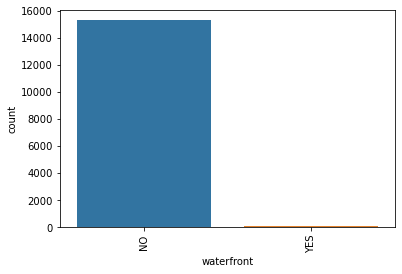

NONE         13947
AVERAGE        666
GOOD           339
FAIR           242
EXCELLENT      235
Name: view, dtype: int64


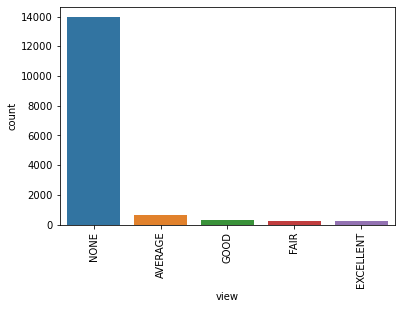

Average      10009
Good          4046
Very Good     1229
Fair           127
Poor            18
Name: condition, dtype: int64


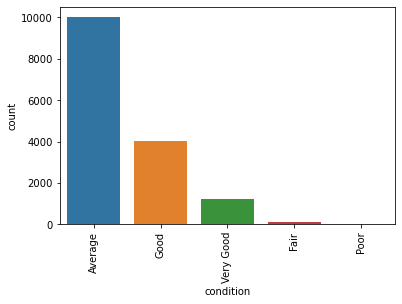

7 Average        6405
8 Good           4338
9 Better         1875
6 Low Average    1454
10 Very Good      816
11 Excellent      286
5 Fair            161
12 Luxury          66
4 Low              16
13 Mansion         11
3 Poor              1
Name: grade, dtype: int64


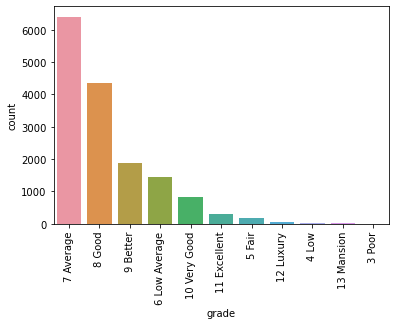

98038    425
98103    415
98052    410
98042    408
98117    394
        ... 
98010     68
98102     63
98024     58
98148     41
98039     35
Name: zipcode, Length: 70, dtype: int64


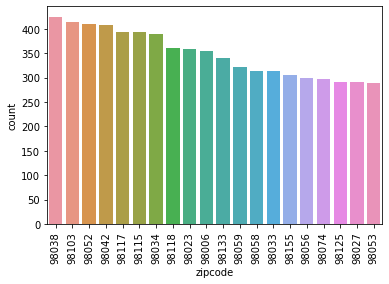

SPRING    4881
SUMMER    4253
AUTUMN    3391
WINTER    2904
Name: season, dtype: int64


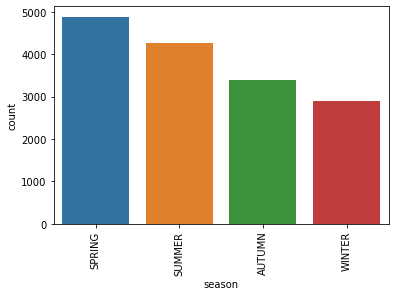

In [15]:
# Plot countplots
object_features = df.select_dtypes(include=["object"])
for i in object_features:
    print(object_features[i].value_counts())
    sns.countplot(x=object_features[i],order= object_features[i].value_counts().iloc[0:20].index)
    plt.xticks(rotation=90)
    plt.show()

#### Conclusions:
* A small population of only 116 houses in King County have a waterfront.
* 90% of houses don't have a view.
* 65% of houses are in average condition and 41% have an average grade. 
* The 98038 zipcode has the highest number of houses.
* House sales are highest in the spring and lowest in the winter. 

### Numerical Features Analysis

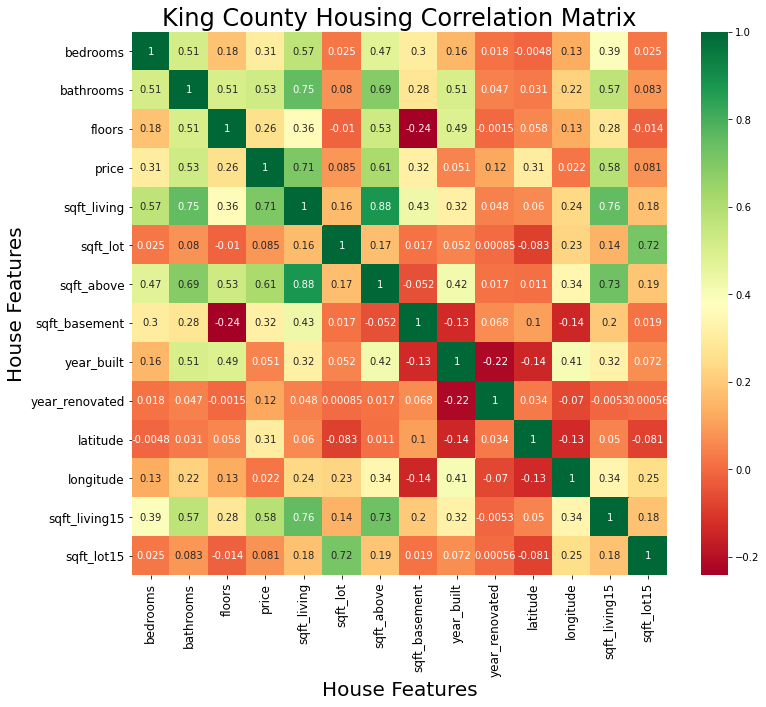

In [16]:
# Plot heatmap to show correlations between all numerical variables (discrete & continous)
numeric_var = ['bedrooms', 'bathrooms', 'floors','price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                'year_built', 'year_renovated', 'latitude', 'longitude', 'sqft_living15', 'sqft_lot15']
corr_matrix = df[numeric_var].corr()
matrix = np.triu(corr_matrix)
plt.subplots(figsize=(12,10))

# Generate mask for upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')

# Label plot
plt.title('King County Housing Correlation Matrix', size=24)
plt.xlabel('House Features', size=20)
plt.ylabel('House Features', size=20)
plt.xticks(size=12)
plt.yticks(size=12);

A heatmap visually shows the correlation coefficients between a pair of features in a dataset. This is an important explanatory step as it shows the strength of the relationship between two variables. A strong relationship between two independent variables is an indication of multicollinearity. This is an issue because it becomes hard to distinguish how an independent variable influences the dependent variable individually. 

#### Conclusions:
* Sqft_above and sqft_living have the highest correlation at 0.88. This shows they have a strong and positive relationship. 
* Sqft_basement and floors have a the lowest correlation at -0.24. This indicates they have an inverse relationship.
* Sqft_living and price share the strongest relationship, with a correlation coefficient of 0.71. Latitude and price share the weakest relationship, with a correlation coefficient of 0.022. 

### Dropping Highly-Correlated Features

* A correlation of 0.7 indicates a strong and positive relationship between two features. While that is good industry benchmark, correlations of 0.9 or higher will be dropped for this analysis.
* Highly correlated features are dropped as they raise speed and storage concerns in models.
* This step is a natural part of the EDA process. 

In [17]:
print("The original dataframe has {} columns.".format(df.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop features
reduced_df = df.drop(to_drop, axis=1)
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 20 columns.


As there are no correlations greater than 0.9, no features were dropped.

In [18]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
1   538000.0         3       2.25         2570      7242     2.0         NO   
3   604000.0         4       3.00         1960      5000     1.0         NO   
4   510000.0         3       2.00         1680      8080     1.0         NO   
5  1230000.0         4       4.50         5420    101930     1.0         NO   
8   229500.0         3       1.00         1780      7470     1.0         NO   

   view  condition         grade  sqft_above  sqft_basement  year_built  \
1  NONE    Average     7 Average        2170          400.0        1951   
3  NONE  Very Good     7 Average        1050          910.0        1965   
4  NONE    Average        8 Good        1680            0.0        1987   
5  NONE    Average  11 Excellent        3890         1530.0        2001   
8  NONE    Average     7 Average        1050          730.0        1960   

   year_renovated zipcode  latitude  longitude  sqft_living15  sqft_lot15  \
1          1991.0   98125   47.7210   -122.319           1690        7639   
3             0.0   98136   47.5208   -122.393           1360        5000   
4             0.0   98074   47.6168   -122.045           1800        7503   
5             0.0   98053   47.6561   -122.005           4760      101930   
8             0.0   98146   47.5123   -122.337           1780        8113   

   season  
1  AUTUMN  
3  AUTUMN  
4  WINTER  
5  SPRING  
8  SPRING

### Analysis on All Variables

In [19]:
# Plot pairplots of all features in the dataframe 

sns.pairplot(df)

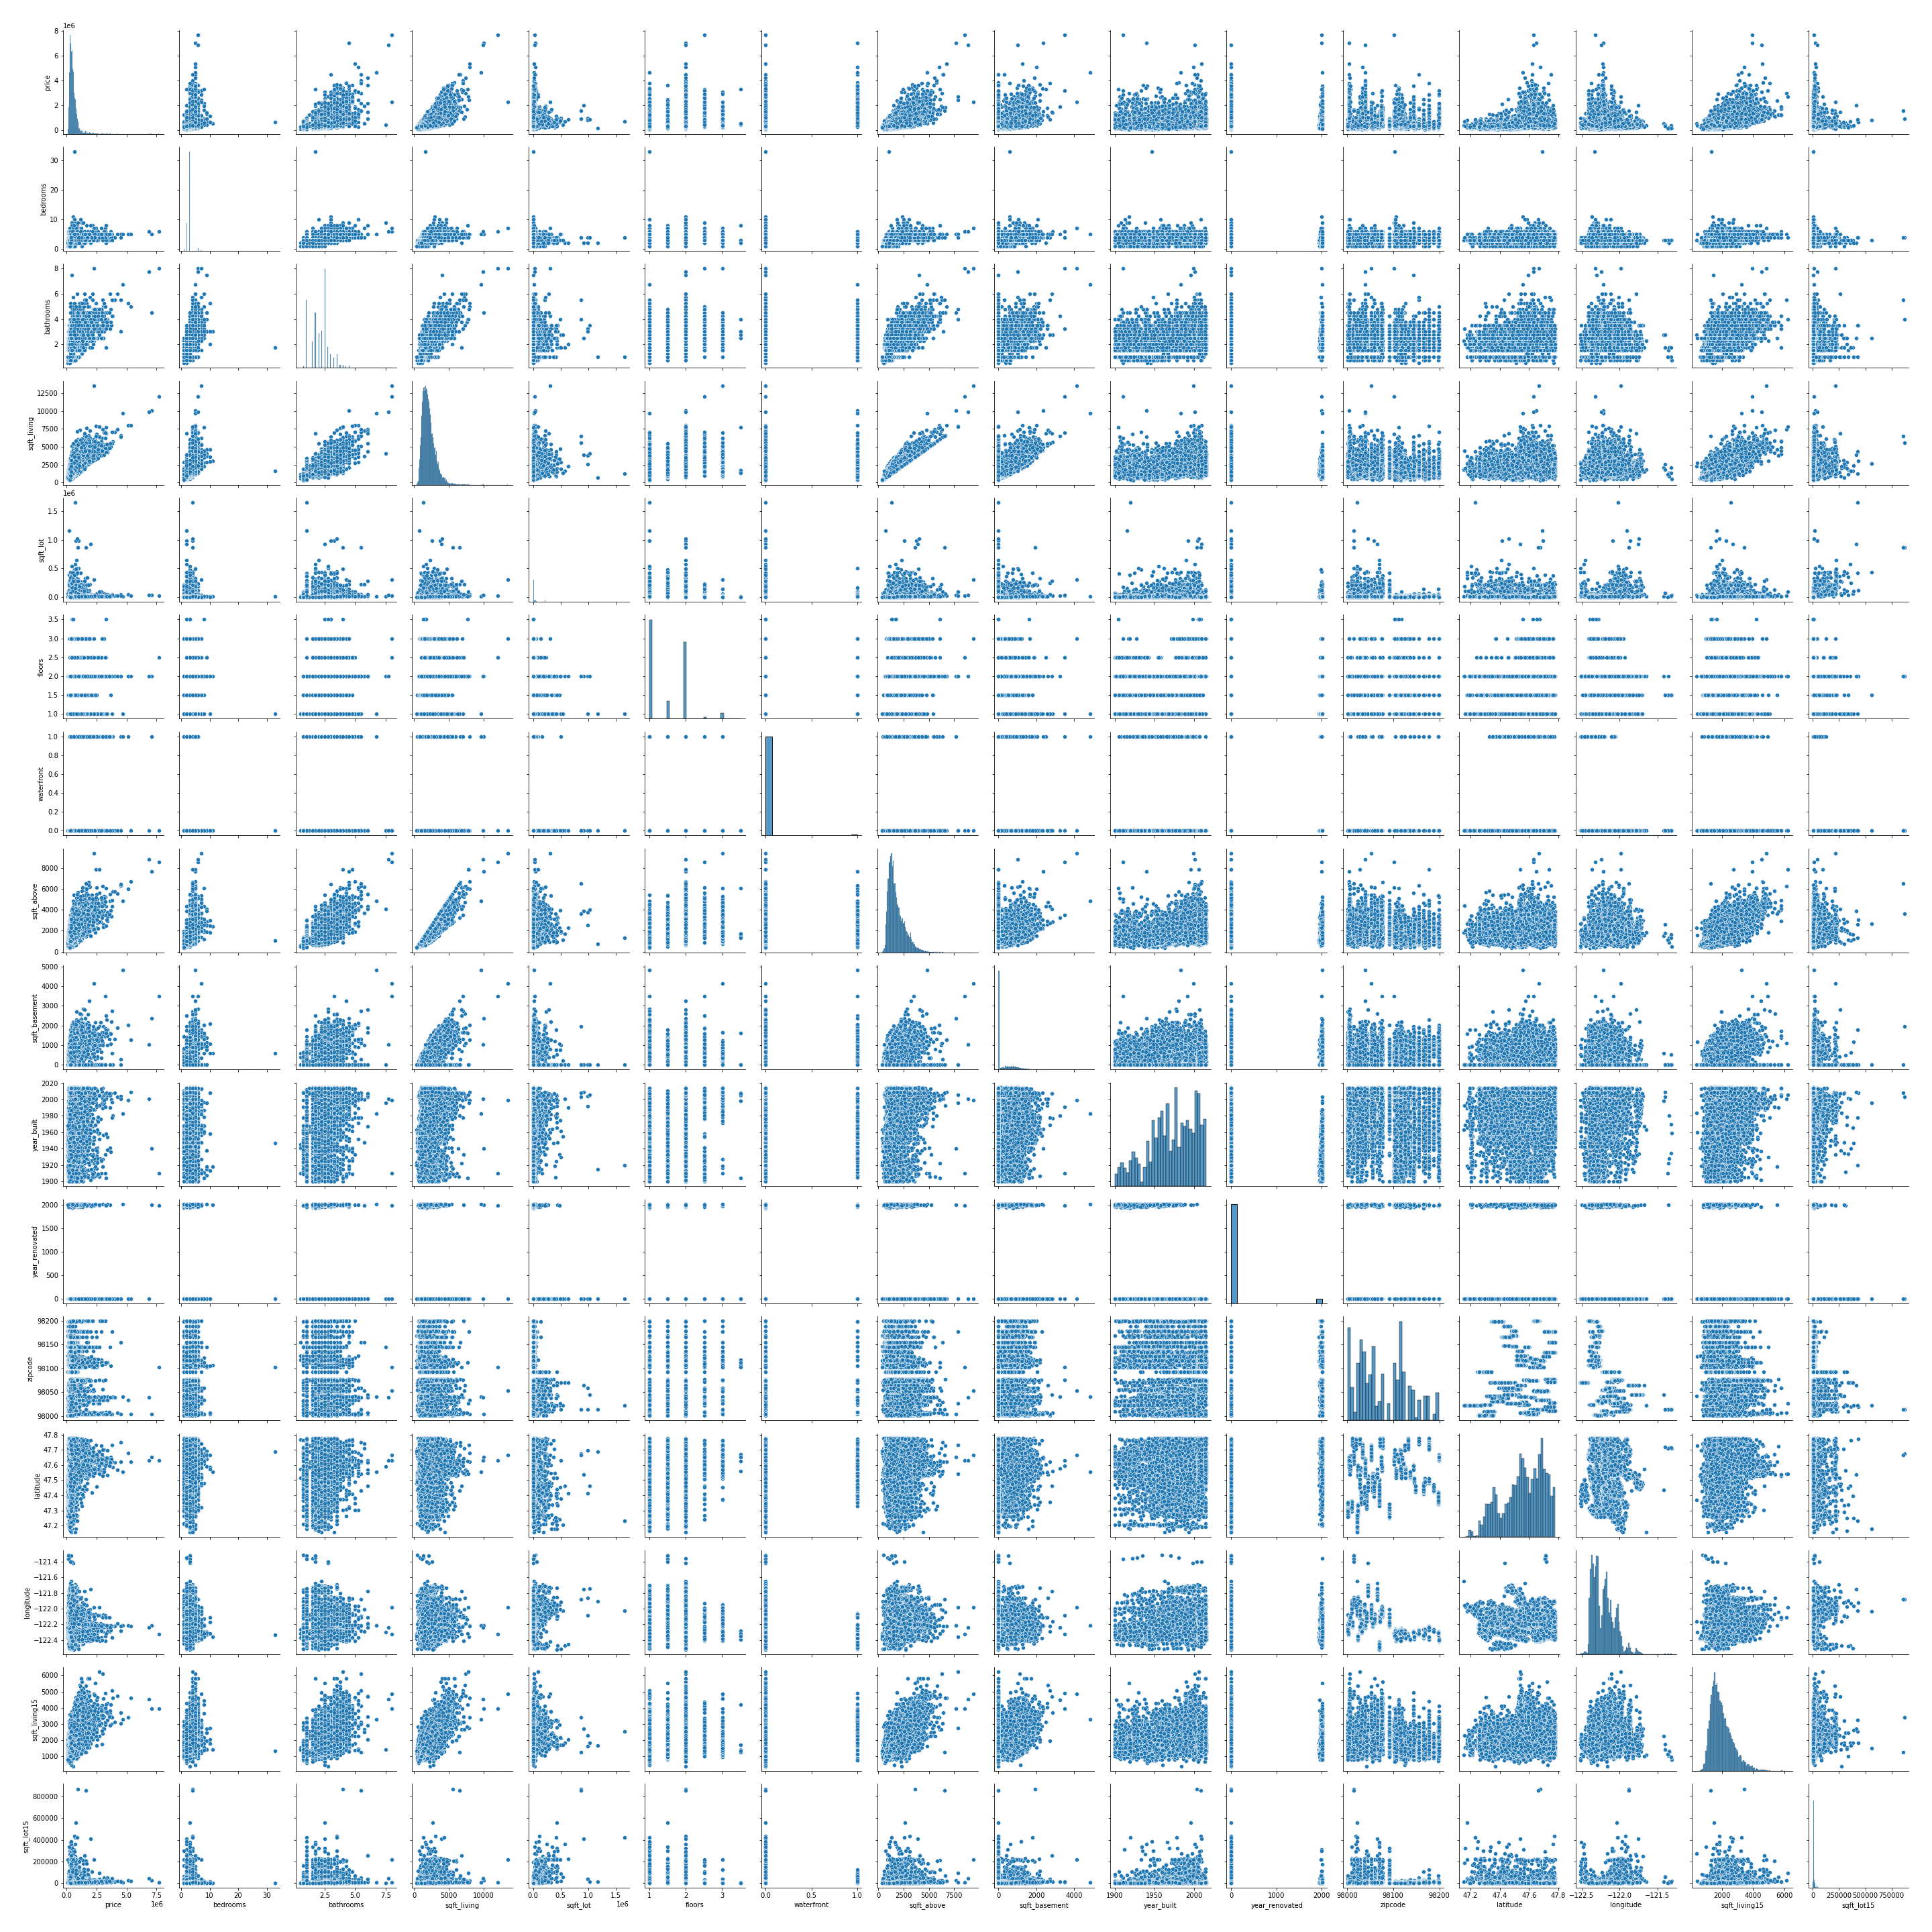

In [20]:
from IPython.display import Image
Image(filename="images/all_features_pairplots.jpeg")

### Analysis on "Price" Feature 

Price will be used as the dependent variable in this analysis. 

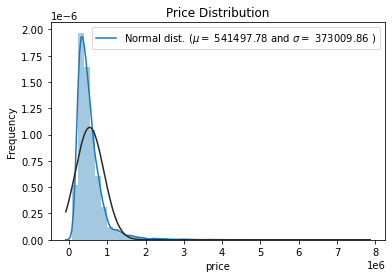

In [21]:
# Plot distribution
sns.distplot(df['price'] , fit=norm);
(mu, sigma) = norm.fit(df['price'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#### Conclusions:
* The price feature has a mean of $541,497.78 and a standard deviation of 373,009.86. 
* From the shape of the distribution, it can be concluded that there are outliers in the price column. The plot has a long tail to the right, which shows there are very few houses with very high prices. 

### Scatterplots of all Features Against Price

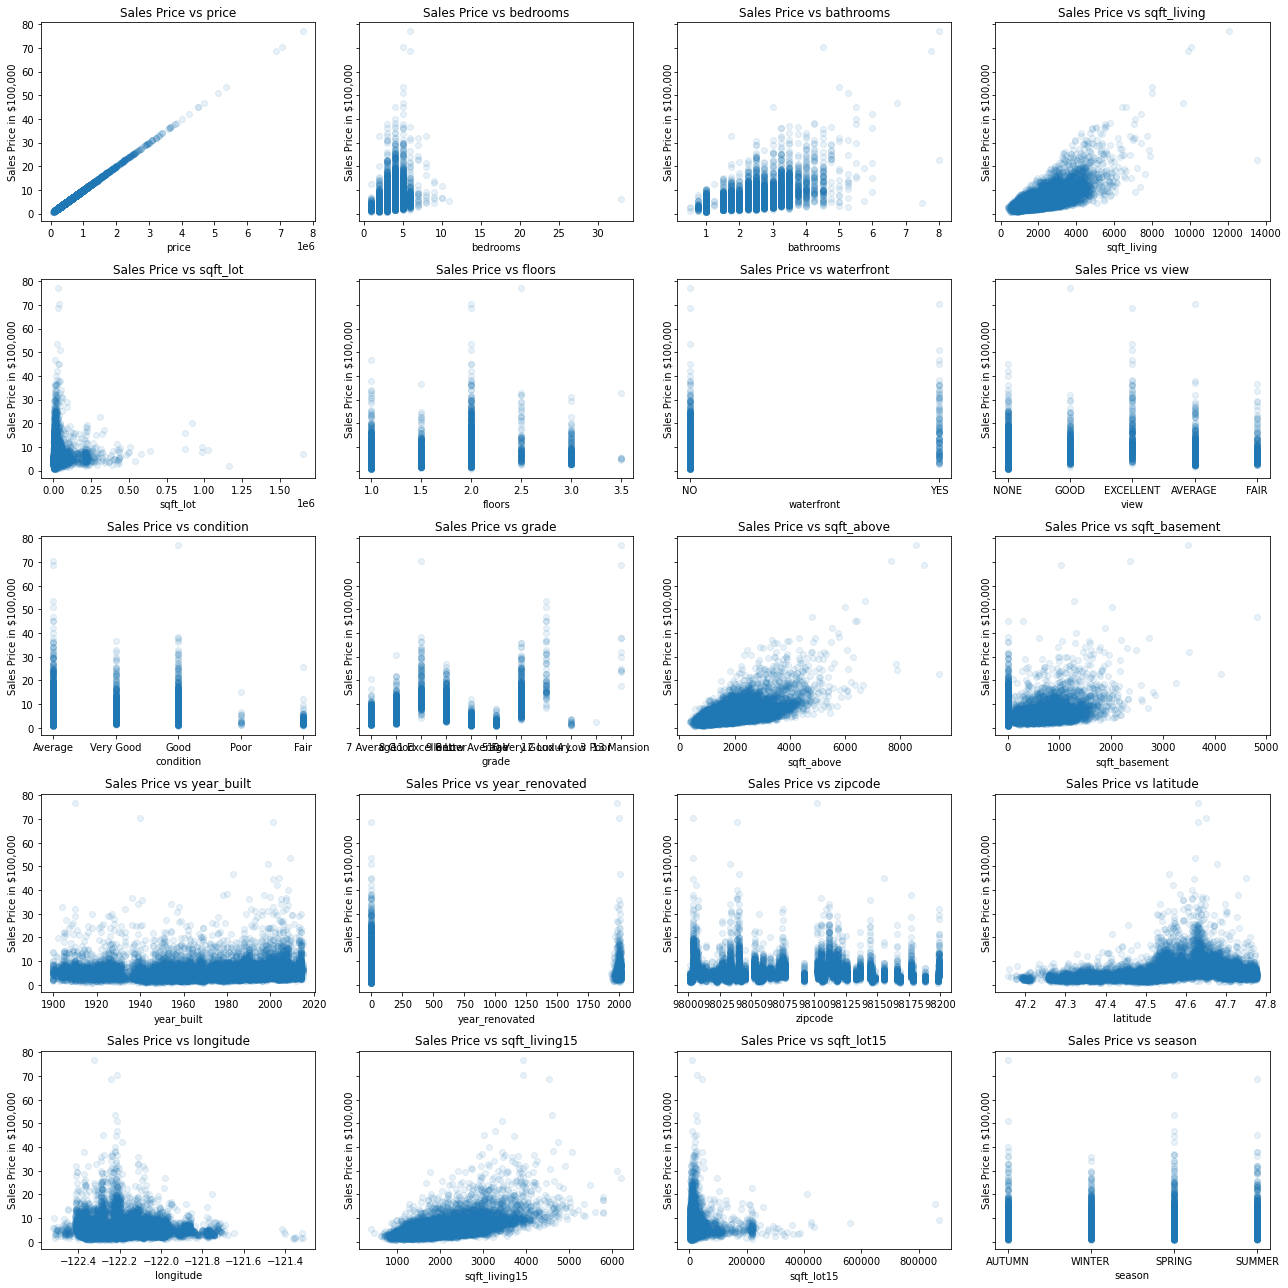

In [22]:
# Scatterplots of all features vs. price
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,18), sharey=True)
for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sales Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sales Price in $100,000')

fig.tight_layout()

#### Conclusions:
* Bedrooms, bathrooms, sqft_living, grade, sqft_above and sqft_basement and sqft_living15 have a positive correlation with price. 
* The year_built, year_renovated, latitude, longitude and zipcode plots don't show much of a relationship to price. 

In [23]:
# Dropping year_built, year_renovated, latitude, longitude & zipcode from the dataframe.
df.drop(['year_built', 'year_renovated', 'latitude', 'longitude', 'zipcode'], axis=1, inplace=True)

# Recheck dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15429 non-null  float64
 1   bedrooms       15429 non-null  int64  
 2   bathrooms      15429 non-null  float64
 3   sqft_living    15429 non-null  int64  
 4   sqft_lot       15429 non-null  int64  
 5   floors         15429 non-null  float64
 6   waterfront     15429 non-null  object 
 7   view           15429 non-null  object 
 8   condition      15429 non-null  object 
 9   grade          15429 non-null  object 
 10  sqft_above     15429 non-null  int64  
 11  sqft_basement  15429 non-null  float64
 12  sqft_living15  15429 non-null  int64  
 13  sqft_lot15     15429 non-null  int64  
 14  season         15429 non-null  object 
dtypes: float64(4), int64(6), object(5)
memory usage: 2.5+ MB


In [24]:
# Generate 5-point statistics for the dataframe
df.describe().T

count           mean            std      min        25%  \
price          15429.0  541497.782552  373021.946914  82000.0  320000.00   
bedrooms       15429.0       3.378767       0.934200      1.0       3.00   
bathrooms      15429.0       2.121508       0.767027      0.5       1.75   
sqft_living    15429.0    2085.516560     919.549240    370.0    1430.00   
sqft_lot       15429.0   15286.159959   41997.368610    520.0    5050.00   
floors         15429.0       1.494556       0.538903      1.0       1.00   
sqft_above     15429.0    1793.705230     829.165362    370.0    1200.00   
sqft_basement  15429.0     291.811329     443.366153      0.0       0.00   
sqft_living15  15429.0    1990.926891     684.796238    399.0    1490.00   
sqft_lot15     15429.0   12862.281159   27783.533647    659.0    5100.00   

                     50%       75%        max  
price          450000.00  643500.0  7700000.0  
bedrooms            3.00       4.0       33.0  
bathrooms           2.25       2.5        8.0  
sqft_living      1920.00    2550.0    13540.0  
sqft_lot         7620.00   10720.0  1651359.0  
floors              1.50       2.0        3.5  
sqft_above       1570.00    2220.0     9410.0  
sqft_basement       0.00     560.0     4820.0  
sqft_living15    1850.00    2370.0     6210.0  
sqft_lot15       7626.00   10108.0   871200.0

#### Some Observations:

* The average mean for bedrooms and bathrooms in King County is 3.38 and 2.12 respectively. 
* The minimum number of beds and baths are 1 and 0.5 and maximum is 33 and 8. Both of these seem to be outliers, causing the data to be skewed. 
* The average living square footage of houses is 2,086 sqft.

### Scaling Numerical Features
* Scaling is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
* In our example, Min-Max Normalization method is applied. MinMaxScaler is used to reduce the effects of outliers in the dataset. By applying the following method, standard deviation problem that we found above will be solved.
* MinMaxScaler is applied on the columns which is defined in "columns_to_be_scaled" variable below.
* scaling used to create ranges and reduce impact if SD. Make the distribution more normal.

In [25]:
# Scale numerical columns
numeric_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','floors','sqft_above','sqft_basement',
                'sqft_living15','sqft_lot15'] 
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in numeric_cols:
    df[i] = scaling(i)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront  \
1   538000.0   0.06250   0.233333     0.167046  0.004072     0.4         NO   
3   604000.0   0.09375   0.333333     0.120729  0.002714     0.0         NO   
4   510000.0   0.06250   0.200000     0.099468  0.004579     0.0         NO   
5  1230000.0   0.09375   0.533333     0.383447  0.061429     0.0         NO   
8   229500.0   0.06250   0.066667     0.107062  0.004210     0.0         NO   

   view  condition         grade  sqft_above  sqft_basement  sqft_living15  \
1  NONE    Average     7 Average    0.199115       0.082988       0.222165   
3  NONE  Very Good     7 Average    0.075221       0.188797       0.165376   
4  NONE    Average        8 Good    0.144912       0.000000       0.241094   
5  NONE    Average  11 Excellent    0.389381       0.317427       0.750473   
8  NONE    Average     7 Average    0.075221       0.151452       0.237653   

   sqft_lot15  season  
1    0.008018  AUTUMN  
3    0.004987  AUTUMN  
4    0.007862  WINTER  
5    0.116331  SPRING  
8    0.008562  SPRING

### One-Hot Encoding
* Transforming categorical features into dummy variables as 0 and 1 to be able to use them in regression models.

In [26]:
dummy_df_waterfront = pd.get_dummies(df["waterfront"],dtype=np.int64,prefix="waterfront_is",drop_first=True)
dummy_df_view = pd.get_dummies(df["view"],dtype=np.int64,prefix="view_is",drop_first=True)
dummy_df_condition = pd.get_dummies(df["condition"],dtype=np.int64,prefix="condition_is",drop_first=True)
dummy_df_grade = pd.get_dummies(df["grade"],dtype=np.int64,prefix="grade_is",drop_first=True)
dummy_df_season = pd.get_dummies(df["season"],dtype=np.int64,prefix="season_is",drop_first=True)

df = pd.concat([df,dummy_df_waterfront,dummy_df_view,dummy_df_condition,dummy_df_grade,dummy_df_season],axis=1)
df = df.loc[:,~df.columns.duplicated()]
df = df.drop(['waterfront', 'view','condition','grade','season'],axis=1)

df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
1   538000.0   0.06250   0.233333     0.167046  0.004072     0.4    0.199115   
3   604000.0   0.09375   0.333333     0.120729  0.002714     0.0    0.075221   
4   510000.0   0.06250   0.200000     0.099468  0.004579     0.0    0.144912   
5  1230000.0   0.09375   0.533333     0.383447  0.061429     0.0    0.389381   
8   229500.0   0.06250   0.066667     0.107062  0.004210     0.0    0.075221   

   sqft_basement  sqft_living15  sqft_lot15  ...  grade_is_3 Poor  \
1       0.082988       0.222165    0.008018  ...                0   
3       0.188797       0.165376    0.004987  ...                0   
4       0.000000       0.241094    0.007862  ...                0   
5       0.317427       0.750473    0.116331  ...                0   
8       0.151452       0.237653    0.008562  ...                0   

   grade_is_4 Low  grade_is_5 Fair  grade_is_6 Low Average  \
1               0                0                       0   
3               0                0                       0   
4               0                0                       0   
5               0                0                       0   
8               0                0                       0   

   grade_is_7 Average  grade_is_8 Good  grade_is_9 Better  season_is_SPRING  \
1                   1                0                  0                 0   
3                   1                0                  0                 0   
4                   0                1                  0                 0   
5                   0                0                  0                 1   
8                   1                0                  0                 1   

   season_is_SUMMER  season_is_WINTER  
1                 0                 0  
3                 0                 0  
4                 0                 1  
5                 0                 0  
8                 0                 0  

[5 rows x 32 columns]

#### Summary of features to be used in modeling:

* price - Prediction target
* bedrooms - Number of of bedrooms in the house
* bathrooms - Number of bathrooms in the house
* sqft_living - Square footage of the house
* sqft_lot - Square footage of the lot
* floors - Total floors in the house
* waterfront - If the house has a waterfront view or not
* view - Overall view that can be seen from the house
* condition - Overall condition of the house
* grade - Overall grade given to the house, based on King County grading system
* sqft_above - Square footage of house, seperate from the basement
* sqft_basement - Square footage of the basement
* sqft_living15 - Square footage of the interior housing living space for the nearest 15 neighbors
* sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors
* season - Season the house was sold

## Modeling using OLS

### Train-Test Split
* Splitting the dataset into training and testing as 75% training and 25% testing

In [27]:
# Split the dataset into training and testing as 75% training and 25% testing
X = df.drop(["price"],axis=1)
y = df["price"]
X_train , X_test , y_train ,y_test = train_test_split(X ,y , test_size = 0.25 , random_state = 42)

### Model 1
* The first model will be a simple linear regression model with one independent variable. This will serve as the baseline model. 
* The variable used in this model will be sqft_living as it shares the strongest relationship to price according to the correlation heatmap plotted above. 

In [28]:
f = 'price ~ sqft_living'
model_1 = ols(formula=f, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.537e+04
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:01:49   Log-Likelihood:            -2.1450e+05
No. Observations:               15429   AIC:                         4.290e+05
Df Residuals:                   15427   BIC:                         4.290e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.984e+04   4498.950     11.077      0.000     4.1e+04    5.87e+04
sqft_living  3.774e+06   3.04e+04    123.992      0.000    3.71e+06    3.83e+06
==============================================================================
Omnibus:                    10920.696   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           451159.757
Skew:                           2.916   Prob(JB):                         0.00
Kurtosis:                      28.841   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 1 Conclusions:
* This model has an R-squared value of 0.499, which means 49.9% of the variation in the dependent variable (price) is explained by the independent variable (sqft_living). 
* Sqft_living has a p-value of 0.00, which indicates it holds a statistically significant relationship with price. 

### Model 2
* To work around adding multicollinearity into the model, the feature added to the mix will be sqft_lot as it shares a weaker relationship, amongst the other features, with both price and sqft_living.  

In [29]:
f = 'price ~ sqft_living + sqft_lot'
model_2 = ols(formula=f, data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     7719.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:01:49   Log-Likelihood:            -2.1449e+05
No. Observations:               15429   AIC:                         4.290e+05
Df Residuals:                   15426   BIC:                         4.290e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.037e+04   4495.403     11.205      0.000    4.16e+04    5.92e+04
sqft_living  3.803e+06   3.08e+04    123.353      0.000    3.74e+06    3.86e+06
sqft_lot      -4.8e+05   8.46e+04     -5.673      0.000   -6.46e+05   -3.14e+05
==============================================================================
Omnibus:                    10879.570   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           444743.528
Skew:                           2.902   Prob(JB):                         0.00
Kurtosis:                      28.654   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2 Conclusions:
* The second model has a higher R-squared value of 0.001. It essentially explains the same amount of variance as the first model. 
* Both p-values are less than 0.05 however sqft_living has is a negative coefficient. This indicates that by increasing the lot size of the house, it would decrease the price of the house. 

### Model 3
* The third model will have all of the features from the cleaned up dataset.

In [30]:
model_3 = smf.add_constant(X)
results = smf.OLS(y, model_3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     950.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:01:49   Log-Likelihood:            -2.1175e+05
No. Observations:               15429   AIC:                         4.236e+05
Df Residuals:                   15398   BIC:                         4.238e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.53

### Model 3 Conclusions:
* Model 3 has an R-squared value is 0.649, meaning 64.9% of the variable price can be explained by all of the independent variables in the model. 
* Some features have a p-value greater than 0.05 and this indicates they do not hold a statistically significant relationship to the dependent variable, price. These features are bathrooms, sqft_lot, fair condition houses, poor condition houses and houses sold in the summmer. 
* Some features have a negative coefficient, which shows they have an inverse relationship with price. Some of these variables make immediate sense however others require some digging.
    * No view present in a houses causes the price to go down, which makes sense. 
    * Having a grade of 9 or below decreases the price of the house, which also makes sense. 
    * Selling the house in the summer decreases the house price as well, which makes sense as the real estate market tends to be hotter in the summer. Since there is a surplus of houses, prices will subsequently be lower. 
    * Bedrooms, bathrooms, sqft_lot and sqft_lot15 are also negative coefficients however those variables need to be further analyzed to understand why this model shows them to adversely affect price. 

### Modeling Conclusions

The first model was ran using a single feature, sqft_living. It was chosen as it shares the strongest relationship with price. The second model was ran with sqft_living and sqft_lot. Sqft_lot has a weaker relationship with both price and sqft_living, making it a good second feature in the model. Both models 1 and 2 had an actual/rounded-up R-squared value of 0.50. The third model included all of the features from the dataset and it yielded the highest R-squared score of all the models ran. This proves that it was the best performing model. 

## Validating Model 3

In [31]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [32]:
# Check the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11571, 31) (11571,) (3858, 31) (3858,)


In [33]:
# Fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Use the model to predict y values for the test and train data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [35]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 49077392051.46043
Test Mean Squared Error:  48842120266.74399


The training MSE is slightly greater than the testing MSE. This implies the model is overfit. This can be fixed by removing some of the numerical features in the model.

## Results
* This section will rank the features used in model 3 to determine which ones add the most value to a house.

In [36]:
# Create predictors
predictors = df.drop(['price'], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors);

# Fit model to data
model = sm.OLS(df['price'],predictors_int).fit()

In [37]:
# View model coefficients in ascending order
# They describe the mathematical relationship between the independent and dependent variables. 
model.params.sort_values()

bedrooms                 -6.370022e+05
sqft_lot15               -5.694568e+05
grade_is_3 Poor          -4.645666e+05
grade_is_5 Fair          -4.465892e+05
grade_is_4 Low           -4.309086e+05
grade_is_6 Low Average   -4.016995e+05
grade_is_7 Average       -3.731009e+05
grade_is_8 Good          -3.130119e+05
grade_is_9 Better        -1.867463e+05
view_is_NONE             -9.442870e+04
sqft_lot                 -3.746945e+04
season_is_SUMMER         -1.726299e+03
bathrooms                -1.306033e+03
condition_is_Fair         4.877510e+03
season_is_WINTER          1.350590e+04
season_is_SPRING          1.995567e+04
condition_is_Good         4.792192e+04
floors                    4.842153e+04
view_is_GOOD              4.850776e+04
condition_is_Poor         5.435538e+04
view_is_FAIR              5.768531e+04
sqft_living15             7.539402e+04
condition_is_Very Good    1.283361e+05
view_is_EXCELLENT         1.599417e+05
grade_is_11 Excellent     2.296835e+05
waterfront_is_YES        

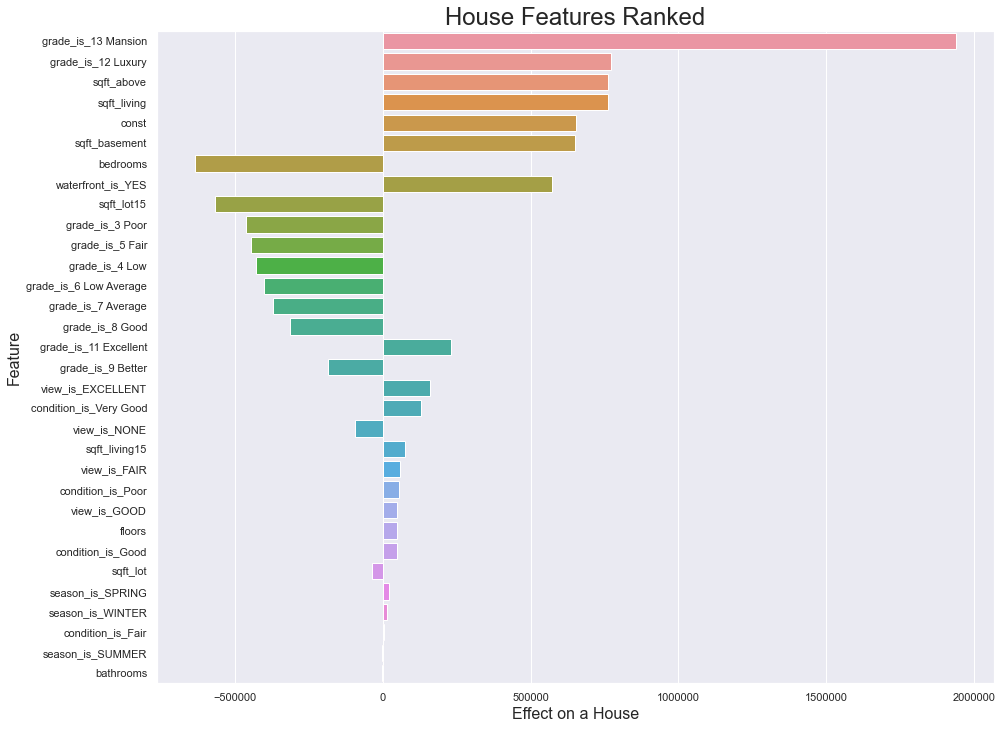

In [38]:
coeff = model.params.sort_values()
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.set(rc={'figure.figsize':(15,12)})
sns.barplot(x=coeff.values, y=coeff.index, orient='h')
plt.xlabel("Effect on a House", size = 16)
plt.ylabel("Feature" , size = 16)
plt.title("House Features Ranked", size = 24)
plt.ticklabel_format(style='plain', axis='x');

## Assumptions of Linear Regression

There are 4 assumptions of linear regression, which increase the credability of a model. The assumptions are:
* Linearity: There is a linear relationship between the independent and dependent variables 
* Homoscedasticity: The variance for the residual is the same for any value of x 
* Normality: Residuals are normally distributed
* Independence: Checks that the observations are independent of one another

### Linearity Check
* Dummy variables meet the assumption of linearity by definition as they creat two data points, and two points define a straight line. There is no check required for them. 
* Numerical variables can be checked with regplots. 

In [39]:
# Convert dataframe columns to a list and seperate out the numeric variables
all_var = df.columns
all_variables = list(all_var)
numeric_variables = all_variables[1:10]
numeric_variables

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

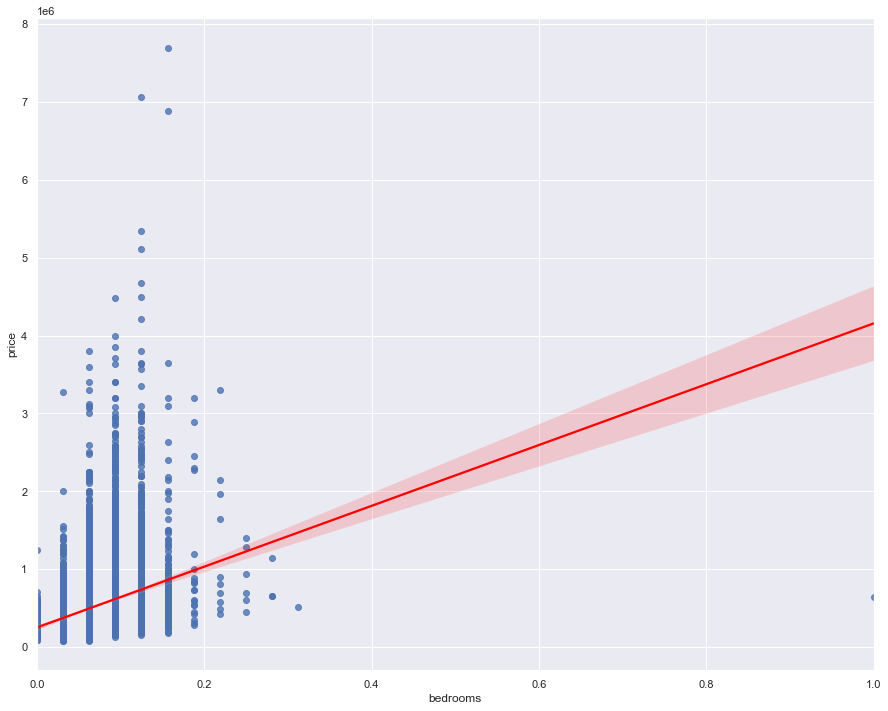

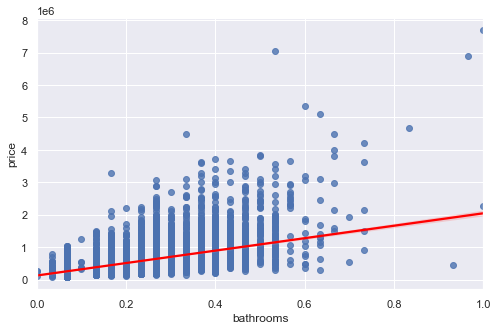

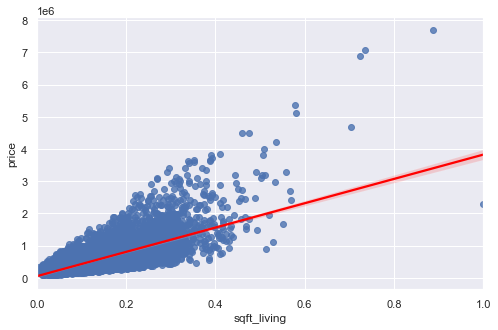

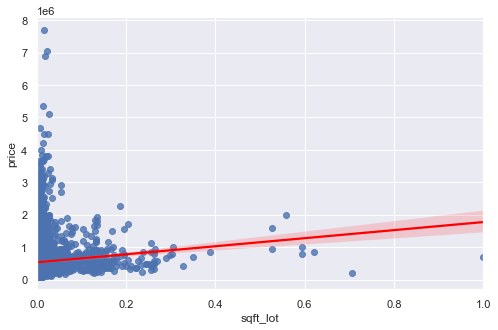

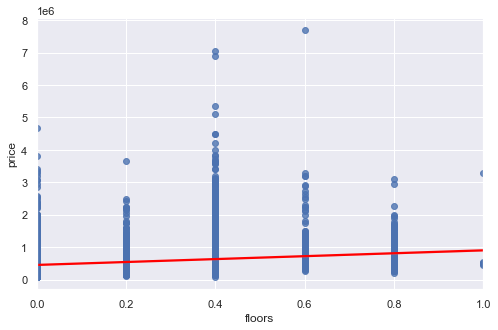

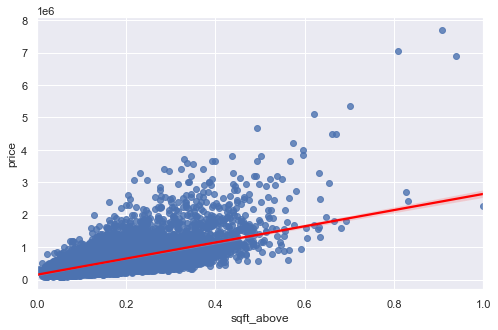

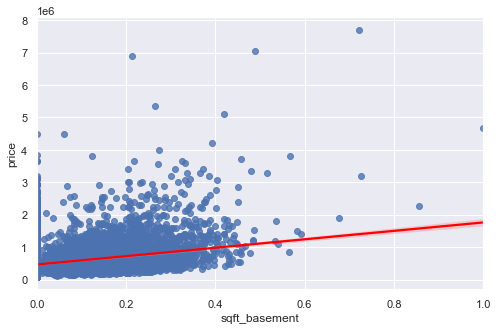

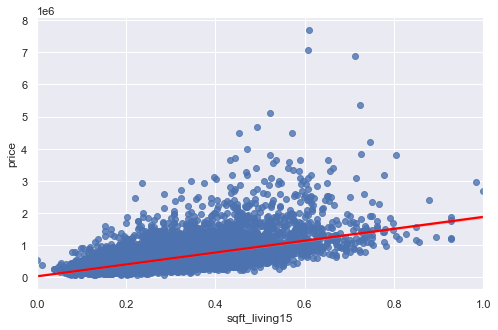

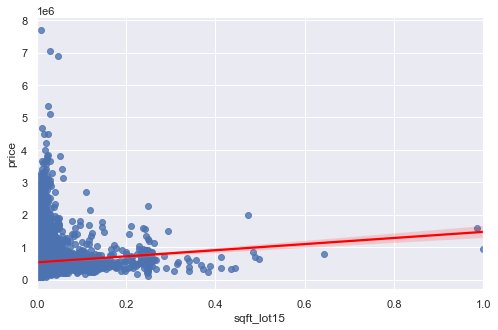

In [40]:
# Regplot loop
for i in numeric_variables:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.regplot(data=df, x=i, y='price', line_kws={"color": "red"})

#### Conclusions:
* According to the scatterplots above, it can be seen that there is a positive linear relationship between all features used in the model and price. 
* Bedrooms seems to have the strongest relationship to price, whereas floors has the weakest. This can be confirmed by calculating the slopes of the plots.  

### Homoscedasticity & Normality
* Homoscedasticity checks if the error is constant along the values of the dependent variable in the entire regression model. 
* The best way to visually check for homoscedascity is by creating a scatterplot with the visuals plotted against the dependent variable. The first step in ploting the scatterplot is to calculate mean absolute error (MAE), which represents the average error in the model. 

* Normality checks if the residuals are normally distributed. Q-Q plots are good ways to check for normality.

#### Calculating MAE

In [41]:
# Yield the predicted values from the model
y_pred = model.fittedvalues

# View the predicted values
y_pred

1        5.103520e+05
3        5.360566e+05
4        4.192399e+05
5        1.532083e+06
8        4.165331e+05
             ...     
21591    3.906904e+05
21592    4.435950e+05
21593    5.087999e+05
21594    3.049112e+05
21596    2.853870e+05
Length: 15429, dtype: float64

In [42]:
# Yield the predicted values from the model
y_pred = model.fittedvalues

# View the predicted values
y_pred

1        5.103520e+05
3        5.360566e+05
4        4.192399e+05
5        1.532083e+06
8        4.165331e+05
             ...     
21591    3.906904e+05
21592    4.435950e+05
21593    5.087999e+05
21594    3.049112e+05
21596    2.853870e+05
Length: 15429, dtype: float64

In [43]:
# Assign the dependent variable to "y"
y = df["price"]

In [44]:
# Return MAE of model
residuals = np.abs(y - y_pred)
mae_resid = np.mean(residuals)

# View residuals from model
mae_resid

146561.03289731237

#### Homoscedasticity Check

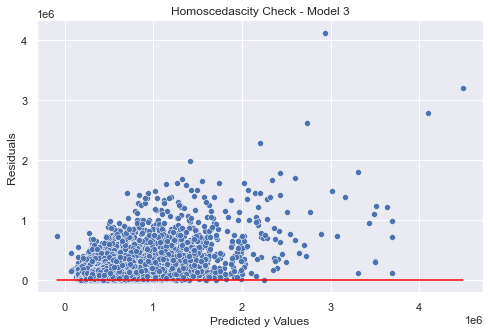

In [45]:
# Plot the residuals against predicted values
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('Predicted y Values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='red')
p = plt.title('Homoscedascity Check - Model 3')

#### Conclusions:
* The variables in the scatterplot have created a cone-line shape, which means the data is not homoscedastic but rather heteroscedastic. 
* There are much more postive residuals versus negative residuals. 
* One cause of this may be a wider range of observed values, which can actually be seen by the outliers on the plot.

#### Normality Check

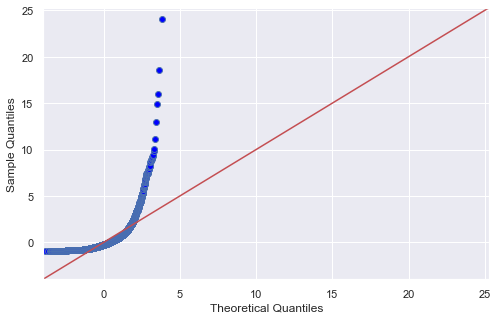

In [46]:
# Ceate a Q-Q plot of the residuals
# Check #2
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

#### Conclusion:
* The points form a curve instead of a straight line. This indicates the data is skewed. 
* This was expected as the summary statistics for model 3 had a skew value of 2.24.
* One way to fix skewness is by removing the outliers. 

### Independece
* This test checks if the observations are independent of one another. This can be checked with a heatmap/correlation matrix.

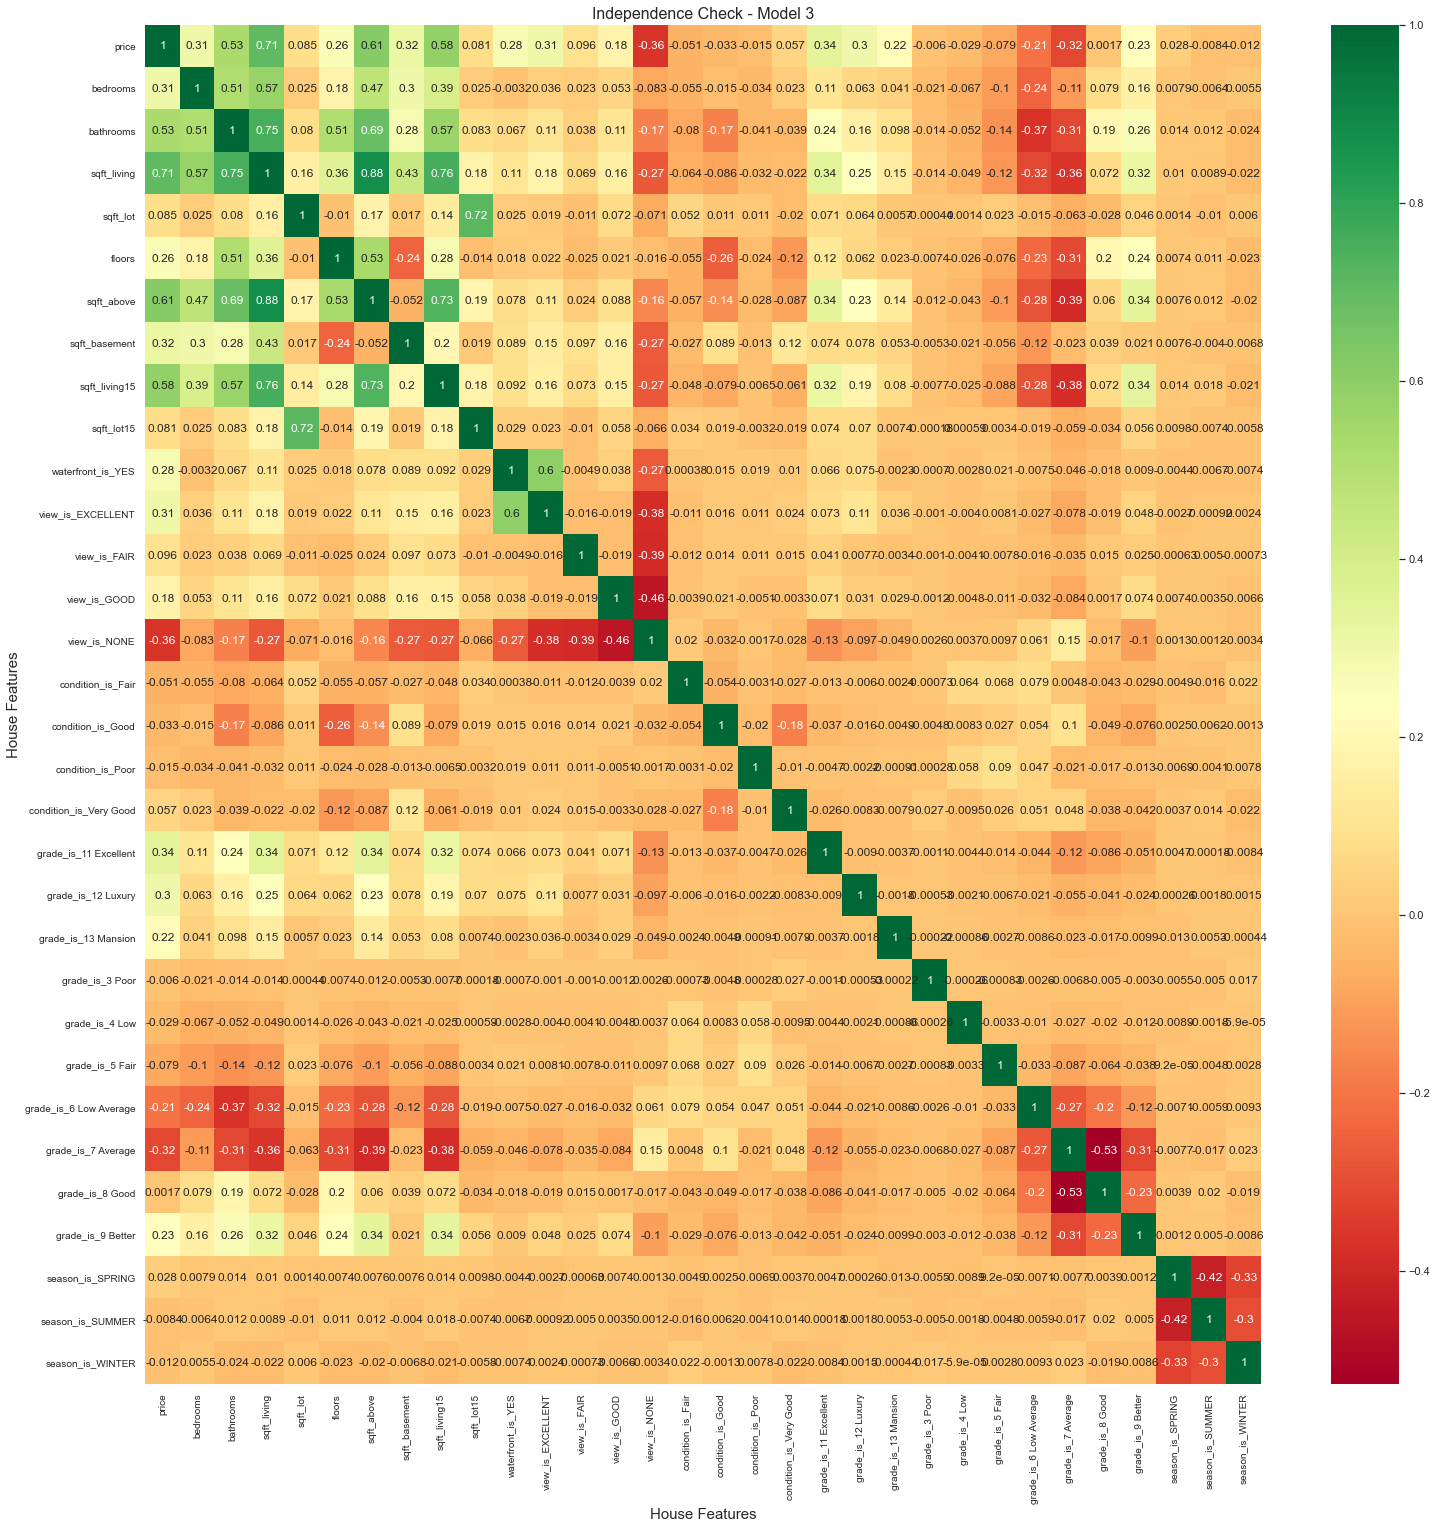

In [47]:
# Plot heatmap to show correlations 
corr_matrix = df.corr()
matrix = np.triu(corr_matrix)
plt.subplots(figsize=(25,25))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')

plt.title('Independence Check - Model 3', size=16)
plt.xlabel('House Features', size=15)
plt.ylabel('House Features', size=15)
plt.xticks(size=10)
plt.yticks(size=10);

#### Conclusions:
* As seen above, sqft_above and sqft_living have the highest correlation, at a value of 0.88.
* There are a few values greater than 0.7 present in the above, which indicates the presence of multi-collinearity in the datset.

## Recommendations

1. Grade has a high impact on the cost of a house. It would be best to invest in homes with a grade of at least an 10. 
2. Square footage of the area above ground and the living area are also strong determinants when it comes to the price of a home. Greater footage in both of those features would be a good investment.
3. Houses with an excellent view also good investments.

## Next Steps
The model used had a few limitations and they were seen while checking the four linear assumptions. It would be beneficial to remove the outliers for some of the features and rerun the model with a smaller group of features.